## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

%matplotlib inline

def plot_data(history_data, title=''):
    plt.clf()
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    fig.suptitle(title)

    train_loss = history_data.history["loss"]
    valid_loss = history_data.history["val_loss"]

    train_acc = history_data.history["acc"]
    valid_acc = history_data.history["val_acc"]

    ax1.plot(range(len(train_loss)), train_loss, label="train")
    ax1.plot(range(len(valid_loss)), valid_loss, label="valid")
    ax1.legend()
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    #ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

    ax2.plot(range(len(train_acc)), train_acc, label="train")
    ax2.plot(range(len(valid_acc)), valid_acc, label="valid")
    ax2.legend()
    ax2.set_ylabel('Accuracy')
    ax2.set_xlabel('Epoch')
    #ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
    
    plt.show()

In [3]:
#train, test = keras.datasets.cifar10.load_data()
#x_train, y_train = train
#x_test, y_test = test

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print(f'x_train={x_train.shape}')
print(f'x_test={x_test.shape}')
print(f'y_train={y_train.shape}')
print(f'y_test={y_test.shape}')
print()

x_train = x_train / 255.
x_test = x_test / 255.

# Flatten the images
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# Convert y to onehot
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

print(f'x_train={x_train.shape}')
print(f'x_test={x_test.shape}')
print(f'y_train={y_train.shape}')
print(f'y_test={y_test.shape}')

x_train=(50000, 32, 32, 3)
x_test=(10000, 32, 32, 3)
y_train=(50000, 1)
y_test=(10000, 1)

x_train=(50000, 3072)
x_test=(10000, 3072)
y_train=(50000, 10)
y_test=(10000, 10)


In [4]:
from keras.models import Sequential
from keras.layers import Dense

def build_model():
    """
    Try to build your own model
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    '''
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(x_train.shape[1],)))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))  
    '''

    return model

In [5]:
from keras import optimizers

LEARNING_RATE = 0.001

adam1 = optimizers.Adam(lr=LEARNING_RATE)
adam2 = optimizers.Adam(lr=LEARNING_RATE)
# ref: https://keras.io/optimizers/
sgd = optimizers.SGD(lr=LEARNING_RATE, decay=1e-6, momentum=0.9, nesterov=True)

test_runs = [
    # ('epochs', 'optimizer', 'title')
    (100, adam1, f"epochs=100 optimizer='adam'"),
    (500, adam2, f"epochs=500 optimizer='adam'"),
    (100, sgd,   f"epochs=100 optimizer='sgd'"),
]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
None
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 11s 212us/step - l

Epoch 52/100
50000/50000 [==============================] - 10s 191us/step - loss: 0.6096 - acc: 0.7824 - val_loss: 1.8104 - val_acc: 0.5275
Epoch 53/100
50000/50000 [==============================] - 11s 212us/step - loss: 0.6021 - acc: 0.7876 - val_loss: 1.8376 - val_acc: 0.5232
Epoch 54/100
50000/50000 [==============================] - 11s 213us/step - loss: 0.5950 - acc: 0.7864 - val_loss: 1.9260 - val_acc: 0.5132
Epoch 55/100
50000/50000 [==============================] - 10s 198us/step - loss: 0.5677 - acc: 0.7984 - val_loss: 1.9801 - val_acc: 0.5161
Epoch 56/100
50000/50000 [==============================] - 10s 206us/step - loss: 0.5652 - acc: 0.7975 - val_loss: 1.9985 - val_acc: 0.5114
Epoch 57/100
50000/50000 [==============================] - 10s 197us/step - loss: 0.5507 - acc: 0.8044 - val_loss: 1.9576 - val_acc: 0.5239
Epoch 58/100
50000/50000 [==============================] - 10s 194us/step - loss: 0.5411 - acc: 0.8094 - val_loss: 1.9761 - val_acc: 0.5207
Epoch 59/100


<Figure size 432x288 with 0 Axes>

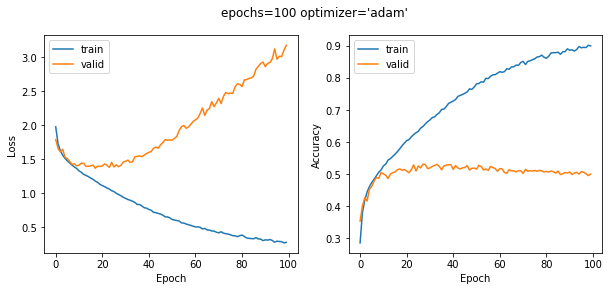

In [6]:
(epochs, optimizer, title) = test_runs[0]
model = build_model()
print(model.summary())

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
      epochs=epochs, 
      batch_size=256, 
      validation_data=(x_test, y_test), 
      shuffle=True)

plot_data(model.history, title)

### 將 Epoch 加到 500 個，並觀察 learning curve 的走勢

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
None
Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 10s 196us/step - l

Epoch 52/500
50000/50000 [==============================] - 10s 207us/step - loss: 0.6257 - acc: 0.7767 - val_loss: 1.8191 - val_acc: 0.5249
Epoch 53/500
50000/50000 [==============================] - 11s 226us/step - loss: 0.6100 - acc: 0.7827 - val_loss: 1.8431 - val_acc: 0.5224
Epoch 54/500
50000/50000 [==============================] - 9s 189us/step - loss: 0.6019 - acc: 0.7853 - val_loss: 1.8511 - val_acc: 0.5175
Epoch 55/500
50000/50000 [==============================] - 9s 188us/step - loss: 0.5941 - acc: 0.7874 - val_loss: 1.8587 - val_acc: 0.5140
Epoch 56/500
50000/50000 [==============================] - 10s 197us/step - loss: 0.5639 - acc: 0.7995 - val_loss: 1.9681 - val_acc: 0.5152
Epoch 57/500
50000/50000 [==============================] - 9s 189us/step - loss: 0.5630 - acc: 0.7993 - val_loss: 1.9726 - val_acc: 0.5163
Epoch 58/500
50000/50000 [==============================] - 9s 189us/step - loss: 0.5405 - acc: 0.8085 - val_loss: 2.0157 - val_acc: 0.5115
Epoch 59/500
5000

50000/50000 [==============================] - 9s 187us/step - loss: 0.2567 - acc: 0.9066 - val_loss: 3.3853 - val_acc: 0.4918
Epoch 111/500
50000/50000 [==============================] - 9s 188us/step - loss: 0.2589 - acc: 0.9074 - val_loss: 3.2511 - val_acc: 0.5029
Epoch 112/500
50000/50000 [==============================] - 9s 188us/step - loss: 0.2496 - acc: 0.9100 - val_loss: 3.3645 - val_acc: 0.5049
Epoch 113/500
50000/50000 [==============================] - 10s 193us/step - loss: 0.2609 - acc: 0.9076 - val_loss: 3.3130 - val_acc: 0.5012
Epoch 114/500
50000/50000 [==============================] - 10s 191us/step - loss: 0.2683 - acc: 0.9052 - val_loss: 3.3676 - val_acc: 0.5000
Epoch 115/500
50000/50000 [==============================] - 9s 189us/step - loss: 0.2357 - acc: 0.9162 - val_loss: 3.4691 - val_acc: 0.4941
Epoch 116/500
50000/50000 [==============================] - 9s 187us/step - loss: 0.2346 - acc: 0.9155 - val_loss: 3.3908 - val_acc: 0.4984
Epoch 117/500
50000/50000

Epoch 168/500
50000/50000 [==============================] - 9s 188us/step - loss: 0.1493 - acc: 0.9476 - val_loss: 4.0984 - val_acc: 0.4992
Epoch 169/500
50000/50000 [==============================] - 9s 188us/step - loss: 0.1475 - acc: 0.9483 - val_loss: 4.2352 - val_acc: 0.4993
Epoch 170/500
50000/50000 [==============================] - 9s 188us/step - loss: 0.1442 - acc: 0.9493 - val_loss: 4.2082 - val_acc: 0.4951
Epoch 171/500
50000/50000 [==============================] - 10s 192us/step - loss: 0.1610 - acc: 0.9426 - val_loss: 4.1698 - val_acc: 0.4915
Epoch 172/500
50000/50000 [==============================] - 9s 189us/step - loss: 0.2336 - acc: 0.9209 - val_loss: 4.2234 - val_acc: 0.4882
Epoch 173/500
50000/50000 [==============================] - 9s 188us/step - loss: 0.2555 - acc: 0.9130 - val_loss: 4.1291 - val_acc: 0.4947
Epoch 174/500
50000/50000 [==============================] - 9s 188us/step - loss: 0.1446 - acc: 0.9484 - val_loss: 4.1806 - val_acc: 0.4925
Epoch 175/50

Epoch 226/500
50000/50000 [==============================] - 9s 188us/step - loss: 0.1097 - acc: 0.9614 - val_loss: 4.5790 - val_acc: 0.5022
Epoch 227/500
50000/50000 [==============================] - 9s 187us/step - loss: 0.0971 - acc: 0.9659 - val_loss: 4.5838 - val_acc: 0.4965
Epoch 228/500
50000/50000 [==============================] - 9s 188us/step - loss: 0.1273 - acc: 0.9557 - val_loss: 4.6219 - val_acc: 0.4996
Epoch 229/500
50000/50000 [==============================] - 9s 188us/step - loss: 0.1129 - acc: 0.9612 - val_loss: 4.6655 - val_acc: 0.4891
Epoch 230/500
50000/50000 [==============================] - 9s 188us/step - loss: 0.2197 - acc: 0.9275 - val_loss: 4.6090 - val_acc: 0.4890
Epoch 231/500
50000/50000 [==============================] - 10s 192us/step - loss: 0.1439 - acc: 0.9503 - val_loss: 4.5781 - val_acc: 0.4972
Epoch 232/500
50000/50000 [==============================] - 9s 189us/step - loss: 0.1045 - acc: 0.9634 - val_loss: 4.5665 - val_acc: 0.4953
Epoch 233/50

50000/50000 [==============================] - 10s 192us/step - loss: 0.0845 - acc: 0.9715 - val_loss: 4.7660 - val_acc: 0.4957
Epoch 284/500
50000/50000 [==============================] - 9s 189us/step - loss: 0.0638 - acc: 0.9770 - val_loss: 4.8302 - val_acc: 0.5010
Epoch 285/500
50000/50000 [==============================] - 9s 188us/step - loss: 0.0888 - acc: 0.9691 - val_loss: 4.9089 - val_acc: 0.4959
Epoch 286/500
50000/50000 [==============================] - 9s 189us/step - loss: 0.1419 - acc: 0.9532 - val_loss: 4.9581 - val_acc: 0.4833
Epoch 287/500
50000/50000 [==============================] - 9s 187us/step - loss: 0.1689 - acc: 0.9453 - val_loss: 4.8668 - val_acc: 0.4920
Epoch 288/500
50000/50000 [==============================] - 10s 190us/step - loss: 0.1458 - acc: 0.9520 - val_loss: 4.7485 - val_acc: 0.4924
Epoch 289/500
50000/50000 [==============================] - 9s 189us/step - loss: 0.0900 - acc: 0.9694 - val_loss: 4.8234 - val_acc: 0.4985
Epoch 290/500
50000/50000

Epoch 341/500
50000/50000 [==============================] - 9s 187us/step - loss: 0.0772 - acc: 0.9738 - val_loss: 5.0871 - val_acc: 0.4935
Epoch 342/500
50000/50000 [==============================] - 9s 188us/step - loss: 0.0787 - acc: 0.9724 - val_loss: 5.2030 - val_acc: 0.4875
Epoch 343/500
50000/50000 [==============================] - 9s 187us/step - loss: 0.0920 - acc: 0.9692 - val_loss: 5.0204 - val_acc: 0.4955
Epoch 344/500
50000/50000 [==============================] - 9s 190us/step - loss: 0.0888 - acc: 0.9695 - val_loss: 5.0365 - val_acc: 0.4943
Epoch 345/500
50000/50000 [==============================] - 9s 188us/step - loss: 0.1912 - acc: 0.9406 - val_loss: 5.0257 - val_acc: 0.4855
Epoch 346/500
50000/50000 [==============================] - 9s 188us/step - loss: 0.1447 - acc: 0.9532 - val_loss: 4.9962 - val_acc: 0.4898
Epoch 347/500
50000/50000 [==============================] - 9s 189us/step - loss: 0.0722 - acc: 0.9763 - val_loss: 4.9997 - val_acc: 0.4958
Epoch 348/500

Epoch 399/500
50000/50000 [==============================] - 9s 190us/step - loss: 0.0088 - acc: 0.9979 - val_loss: 5.0806 - val_acc: 0.5044
Epoch 400/500
50000/50000 [==============================] - 9s 189us/step - loss: 0.4933 - acc: 0.8897 - val_loss: 4.8764 - val_acc: 0.4767
Epoch 401/500
50000/50000 [==============================] - 9s 189us/step - loss: 0.2630 - acc: 0.9220 - val_loss: 4.8872 - val_acc: 0.4991
Epoch 402/500
50000/50000 [==============================] - 9s 188us/step - loss: 0.0671 - acc: 0.9781 - val_loss: 4.8688 - val_acc: 0.4968
Epoch 403/500
50000/50000 [==============================] - 9s 189us/step - loss: 0.0323 - acc: 0.9899 - val_loss: 4.9294 - val_acc: 0.4992
Epoch 404/500
50000/50000 [==============================] - 9s 188us/step - loss: 0.0179 - acc: 0.9952 - val_loss: 4.9333 - val_acc: 0.5041
Epoch 405/500
50000/50000 [==============================] - 9s 189us/step - loss: 0.0069 - acc: 0.9991 - val_loss: 4.9698 - val_acc: 0.5057
Epoch 406/500

Epoch 457/500
50000/50000 [==============================] - 10s 205us/step - loss: 0.0023 - acc: 0.9999 - val_loss: 5.1916 - val_acc: 0.5033
Epoch 458/500
50000/50000 [==============================] - 9s 189us/step - loss: 0.0036 - acc: 0.9994 - val_loss: 5.2158 - val_acc: 0.4998
Epoch 459/500
50000/50000 [==============================] - 9s 189us/step - loss: 0.7571 - acc: 0.8450 - val_loss: 4.8843 - val_acc: 0.4759
Epoch 460/500
50000/50000 [==============================] - 9s 188us/step - loss: 0.2027 - acc: 0.9392 - val_loss: 4.7737 - val_acc: 0.4989
Epoch 461/500
50000/50000 [==============================] - 9s 189us/step - loss: 0.0682 - acc: 0.9777 - val_loss: 4.8357 - val_acc: 0.4970
Epoch 462/500
50000/50000 [==============================] - 10s 191us/step - loss: 0.0170 - acc: 0.9961 - val_loss: 4.8370 - val_acc: 0.5027
Epoch 463/500
50000/50000 [==============================] - 9s 189us/step - loss: 0.0105 - acc: 0.9984 - val_loss: 4.8804 - val_acc: 0.5027
Epoch 464/5

<Figure size 432x288 with 0 Axes>

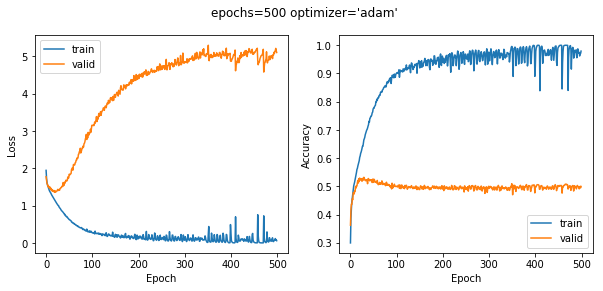

In [7]:
(epochs, optimizer, title) = test_runs[1]
model = build_model()
print(model.summary())

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
      epochs=epochs, 
      batch_size=256, 
      validation_data=(x_test, y_test), 
      shuffle=True)

plot_data(model.history, title)

### 將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_10 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
None
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 9s 171us/step - lo

50000/50000 [==============================] - 8s 155us/step - loss: 1.1182 - acc: 0.6067 - val_loss: 1.3428 - val_acc: 0.5263
Epoch 53/100
50000/50000 [==============================] - 8s 153us/step - loss: 1.1133 - acc: 0.6092 - val_loss: 1.3585 - val_acc: 0.5232
Epoch 54/100
50000/50000 [==============================] - 8s 153us/step - loss: 1.1024 - acc: 0.6133 - val_loss: 1.3293 - val_acc: 0.5281
Epoch 55/100
50000/50000 [==============================] - 8s 154us/step - loss: 1.0940 - acc: 0.6170 - val_loss: 1.3660 - val_acc: 0.5177
Epoch 56/100
50000/50000 [==============================] - 8s 153us/step - loss: 1.0839 - acc: 0.6186 - val_loss: 1.4258 - val_acc: 0.5048
Epoch 57/100
50000/50000 [==============================] - 8s 153us/step - loss: 1.0815 - acc: 0.6206 - val_loss: 1.3784 - val_acc: 0.5208
Epoch 58/100
50000/50000 [==============================] - 8s 154us/step - loss: 1.0712 - acc: 0.6249 - val_loss: 1.4643 - val_acc: 0.4994
Epoch 59/100
50000/50000 [=======

<Figure size 432x288 with 0 Axes>

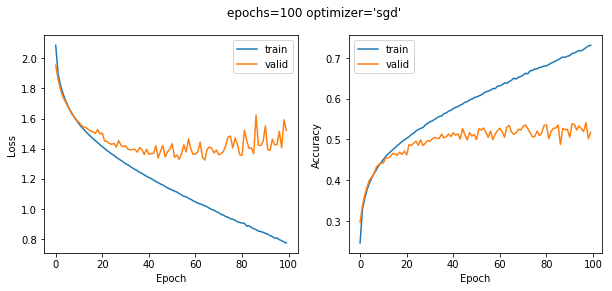

In [8]:
(epochs, optimizer, title) = test_runs[2]
model = build_model()
print(model.summary())

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
      epochs=epochs, 
      batch_size=256, 
      validation_data=(x_test, y_test), 
      shuffle=True)

plot_data(model.history, title)